In [9]:
import warnings  
warnings.filterwarnings('ignore')
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.interpolate import griddata
from matplotlib.colors import SymLogNorm
from matplotlib import cm
import geopandas as gpd
import seaborn as sns
from matplotlib.colors import LogNorm
from scipy import ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable
import glob
import pyvista as pv
import pandas as pd
# %matplotlib notebook

size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)



flowlines=np.sort(glob.glob('/home/urrutyb/Documents/PhD_TiPACCS/topo_antarctica/flow_line*.csv'))

url='/home/urrutyb/Documents/simu/bedmap_20yrs/'
files = sorted(glob.glob(url + 'run*.pvtu'))
files_no = sorted(glob.glob(url + 'run*1.pvtu'))
files = [i for i in files if i not in files_no[2:]]
files.remove(files[0])
figure=url + 'figure/'


blocks = pv.MultiBlock([pv.read(f) for f in files])

x=blocks[0].points[:,0]
y=blocks[0].points[:,1]


['/home/urrutyb/Documents/simu/bedmap_20yrs/run1_0001.pvtu',
 '/home/urrutyb/Documents/simu/bedmap_20yrs/run1_0002.pvtu',
 '/home/urrutyb/Documents/simu/bedmap_20yrs/run1_0003.pvtu',
 '/home/urrutyb/Documents/simu/bedmap_20yrs/run1_0004.pvtu',
 '/home/urrutyb/Documents/simu/bedmap_20yrs/run1_0005.pvtu',
 '/home/urrutyb/Documents/simu/bedmap_20yrs/run1_0006.pvtu',
 '/home/urrutyb/Documents/simu/bedmap_20yrs/run2_0002.pvtu',
 '/home/urrutyb/Documents/simu/bedmap_20yrs/run2_0003.pvtu',
 '/home/urrutyb/Documents/simu/bedmap_20yrs/run2_0004.pvtu',
 '/home/urrutyb/Documents/simu/bedmap_20yrs/run2_0005.pvtu',
 '/home/urrutyb/Documents/simu/bedmap_20yrs/run2_0006.pvtu',
 '/home/urrutyb/Documents/simu/bedmap_20yrs/run3_0002.pvtu',
 '/home/urrutyb/Documents/simu/bedmap_20yrs/run3_0003.pvtu',
 '/home/urrutyb/Documents/simu/bedmap_20yrs/run3_0004.pvtu',
 '/home/urrutyb/Documents/simu/bedmap_20yrs/run3_0005.pvtu',
 '/home/urrutyb/Documents/simu/bedmap_20yrs/run3_0006.pvtu',
 '/home/urrutyb/Document

In [80]:
import time
start_time = time.time()
t_inf = time.time()


meth='nearest'
for n in range(0,len(flowlines)):
    x_fl,y_fl=np.loadtxt(flowlines[n],skiprows=1,delimiter=',',usecols=(22,23),unpack=True)
    groundedmask=np.zeros([len(blocks),len(x_fl)])
    bedrock=np.zeros([len(blocks),len(x_fl)])
    zs=np.zeros([len(blocks),len(x_fl)])
    zb=np.zeros([len(blocks),len(x_fl)])
    alpha=np.zeros([len(blocks),len(x_fl)])
    mu=np.zeros([len(blocks),len(x_fl)])
    pdc_melt=np.zeros([len(blocks),len(x_fl)])
    h=np.zeros([len(blocks),len(x_fl)])
    h_residual=np.zeros([len(blocks),len(x_fl)])
    dhdt=np.zeros([len(blocks),len(x_fl)])
    smb=np.zeros([len(blocks),len(x_fl)])
    pdc_area=np.zeros([len(blocks),len(x_fl)])
    ssavelocity_mag=np.zeros([len(blocks),len(x_fl)])
    dist=np.zeros(len(x_fl))
    for i in range(0,len(x_fl)-1):
        dist[i+1]=dist[i]+np.sqrt((x_fl[i]-x_fl[i+1])**2+(y_fl[i]-y_fl[i+1])**2)/1000
    for i in range(0,len(blocks)):
        groundedmask[i,]=griddata((x,y),blocks[i].point_arrays['groundedmask'],(x_fl,y_fl), method=meth)
        bedrock[i,]=griddata((x,y),blocks[i].point_arrays['bedrock'],(x_fl,y_fl), method=meth)
        zs[i,]=griddata((x,y),blocks[i].point_arrays['zs'],(x_fl,y_fl), method=meth)
        zb[i,]=griddata((x,y),blocks[i].point_arrays['zb'],(x_fl,y_fl), method=meth)
        alpha[i,]=griddata((x,y),blocks[i].point_arrays['alpha'],(x_fl,y_fl), method=meth)
        mu[i,]=griddata((x,y),blocks[i].point_arrays['mu'],(x_fl,y_fl), method=meth)
        pdc_melt[i,]=griddata((x,y),blocks[i].point_arrays['pdc_melt'],(x_fl,y_fl), method=meth)
        h[i,]=griddata((x,y),blocks[i].point_arrays['h'],(x_fl,y_fl), method=meth)
        h_residual[i,]=griddata((x,y),blocks[i].point_arrays['h residual'],(x_fl,y_fl), method=meth)
        dhdt[i,]=griddata((x,y),blocks[i].point_arrays['dhdt'],(x_fl,y_fl), method=meth)
        smb[i,]=griddata((x,y),blocks[i].point_arrays['smb'],(x_fl,y_fl), method=meth)
        pdc_area[i,]=griddata((x,y),blocks[i].point_arrays['pdc_area'],(x_fl,y_fl), method=meth)
        ssavelocity=blocks[i].point_arrays['ssavelocity']
        ssavelocity_mag[i,:]=griddata((x,y),np.sqrt(ssavelocity[:,0]**2+ssavelocity[:,1]**2),(x_fl,y_fl), method=meth)
    d={'groundedmask': groundedmask,'bedrock':bedrock,'zs':zs,'zb':zb,'alpha':alpha,'mu':mu,'pdc_melt':pdc_melt,'h':h,'h_residual':h_residual,
      'dhdt':dhdt,'smb':smb,'pdc_area':pdc_area,'ssavelocity_mag':ssavelocity_mag,'dist':dist}
    xx=flowlines[n][52:-4]
    globals()[xx]=d
    print(xx)
    partime=(time.time() - t_inf)
    t_inf=time.time()
    print("--- %s seconds ---" % partime)
    prout
    
print("--- %s seconds ---" % (time.time() - start_time))


KeyError: 'h residual'

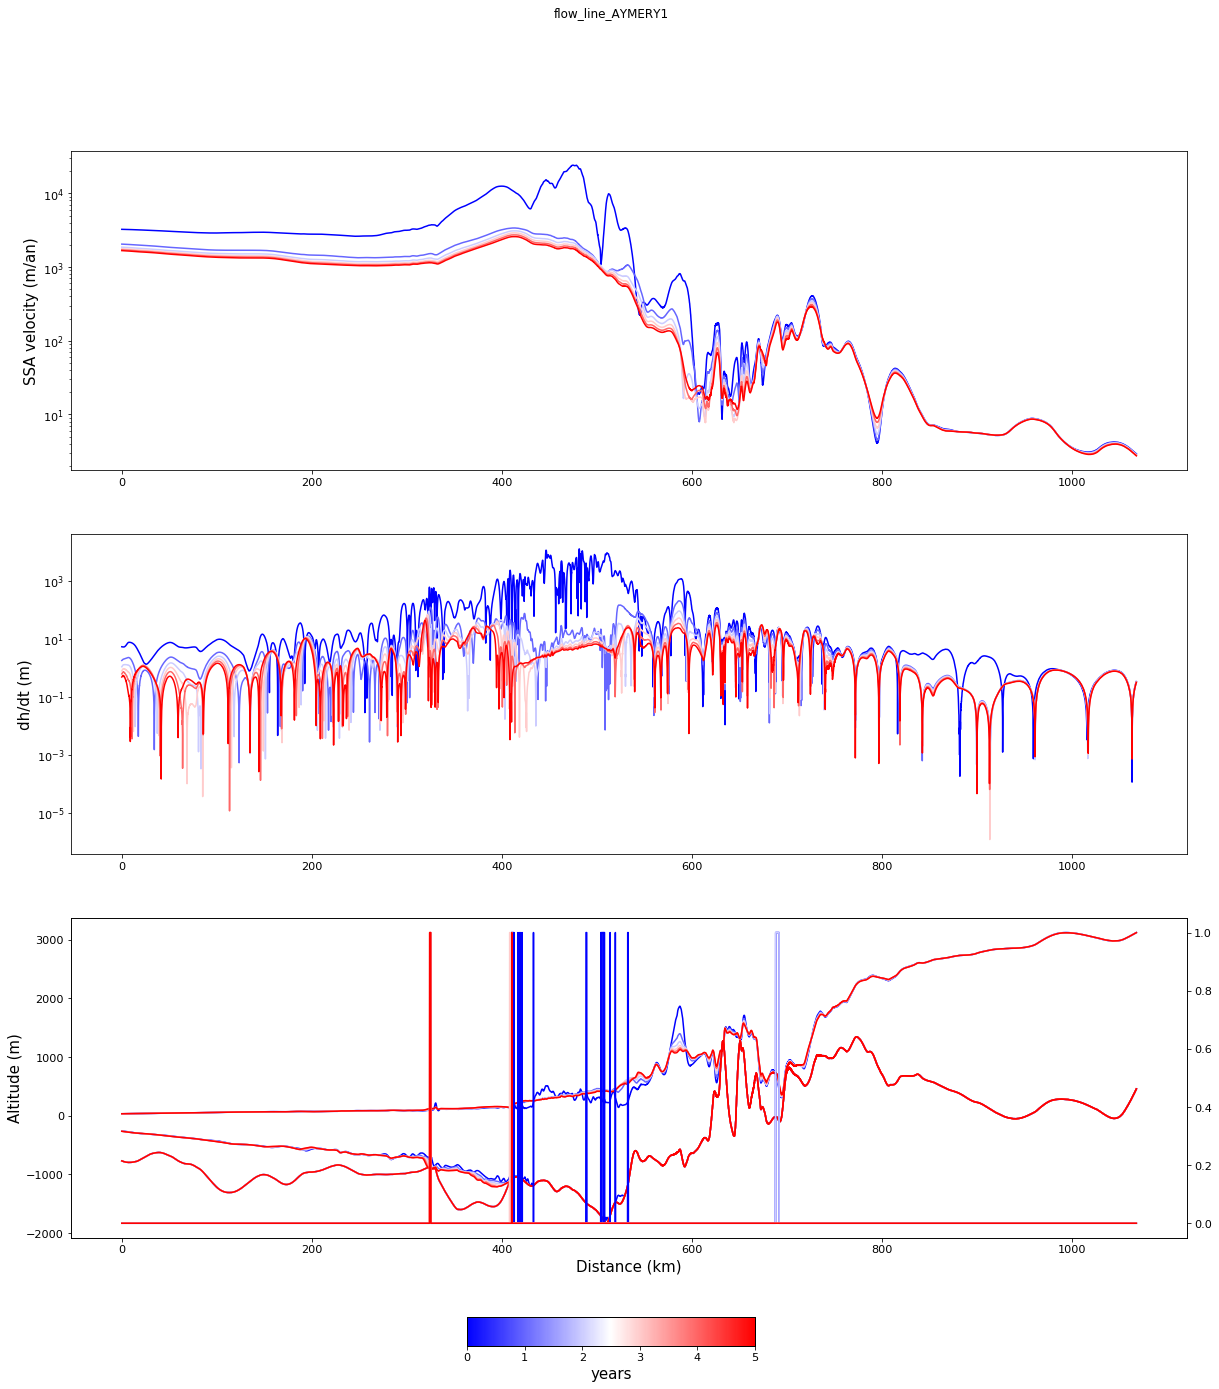

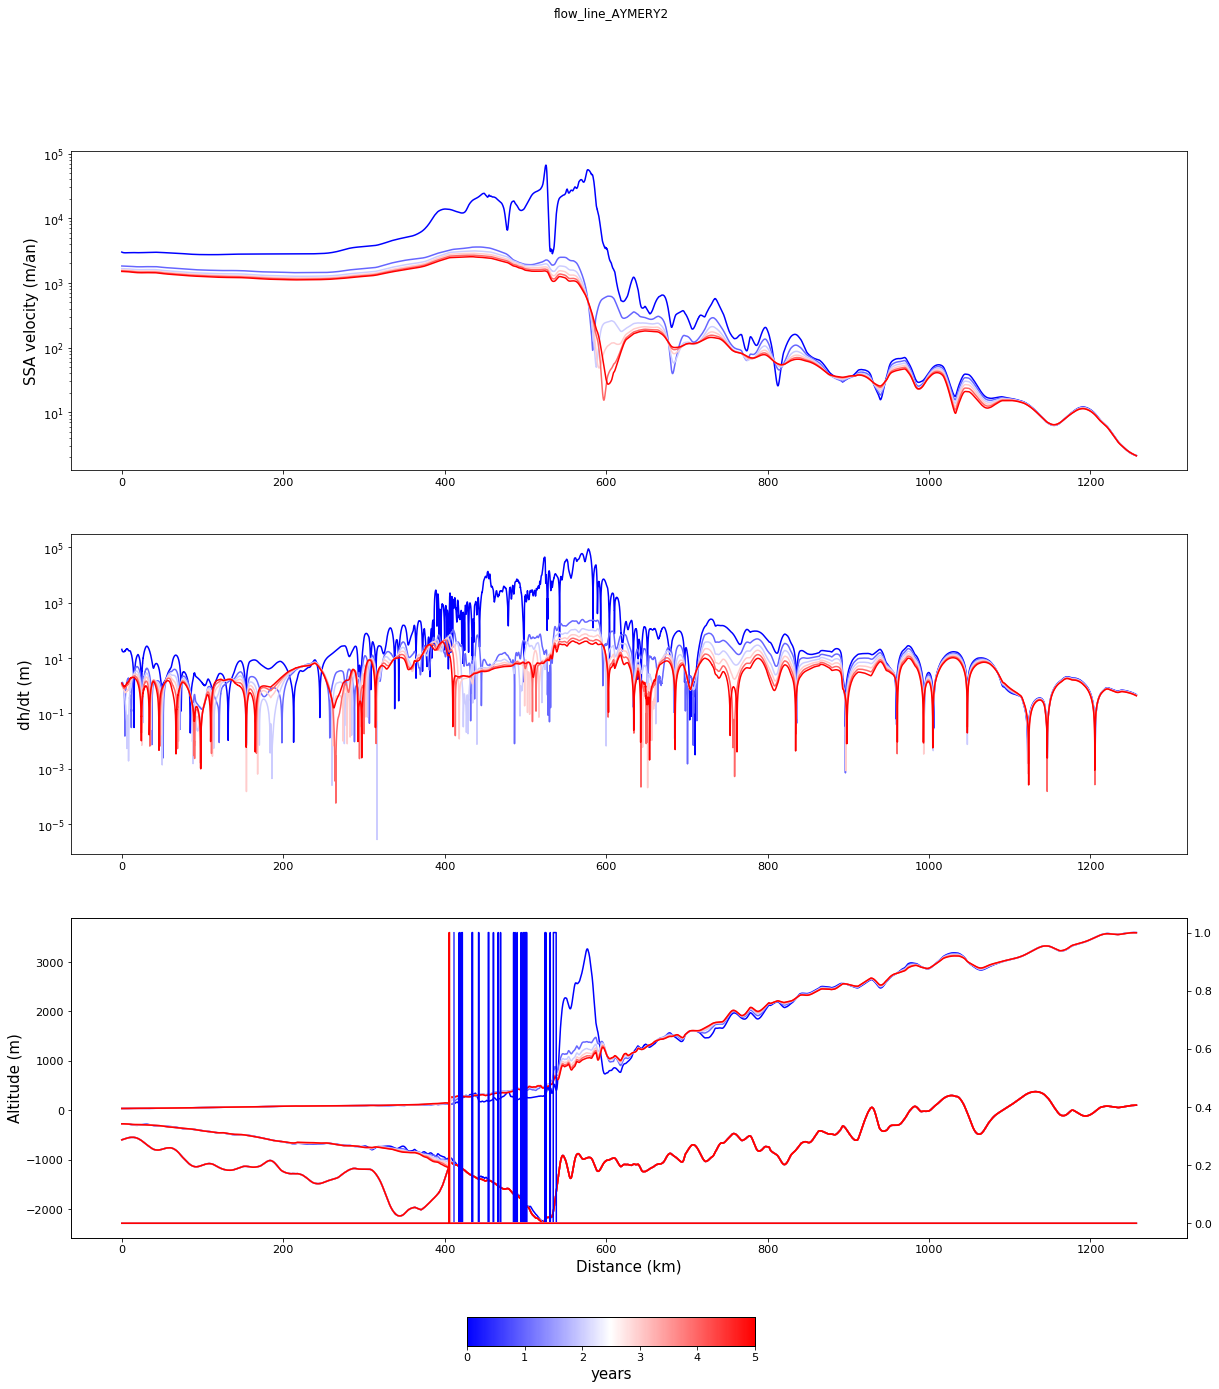

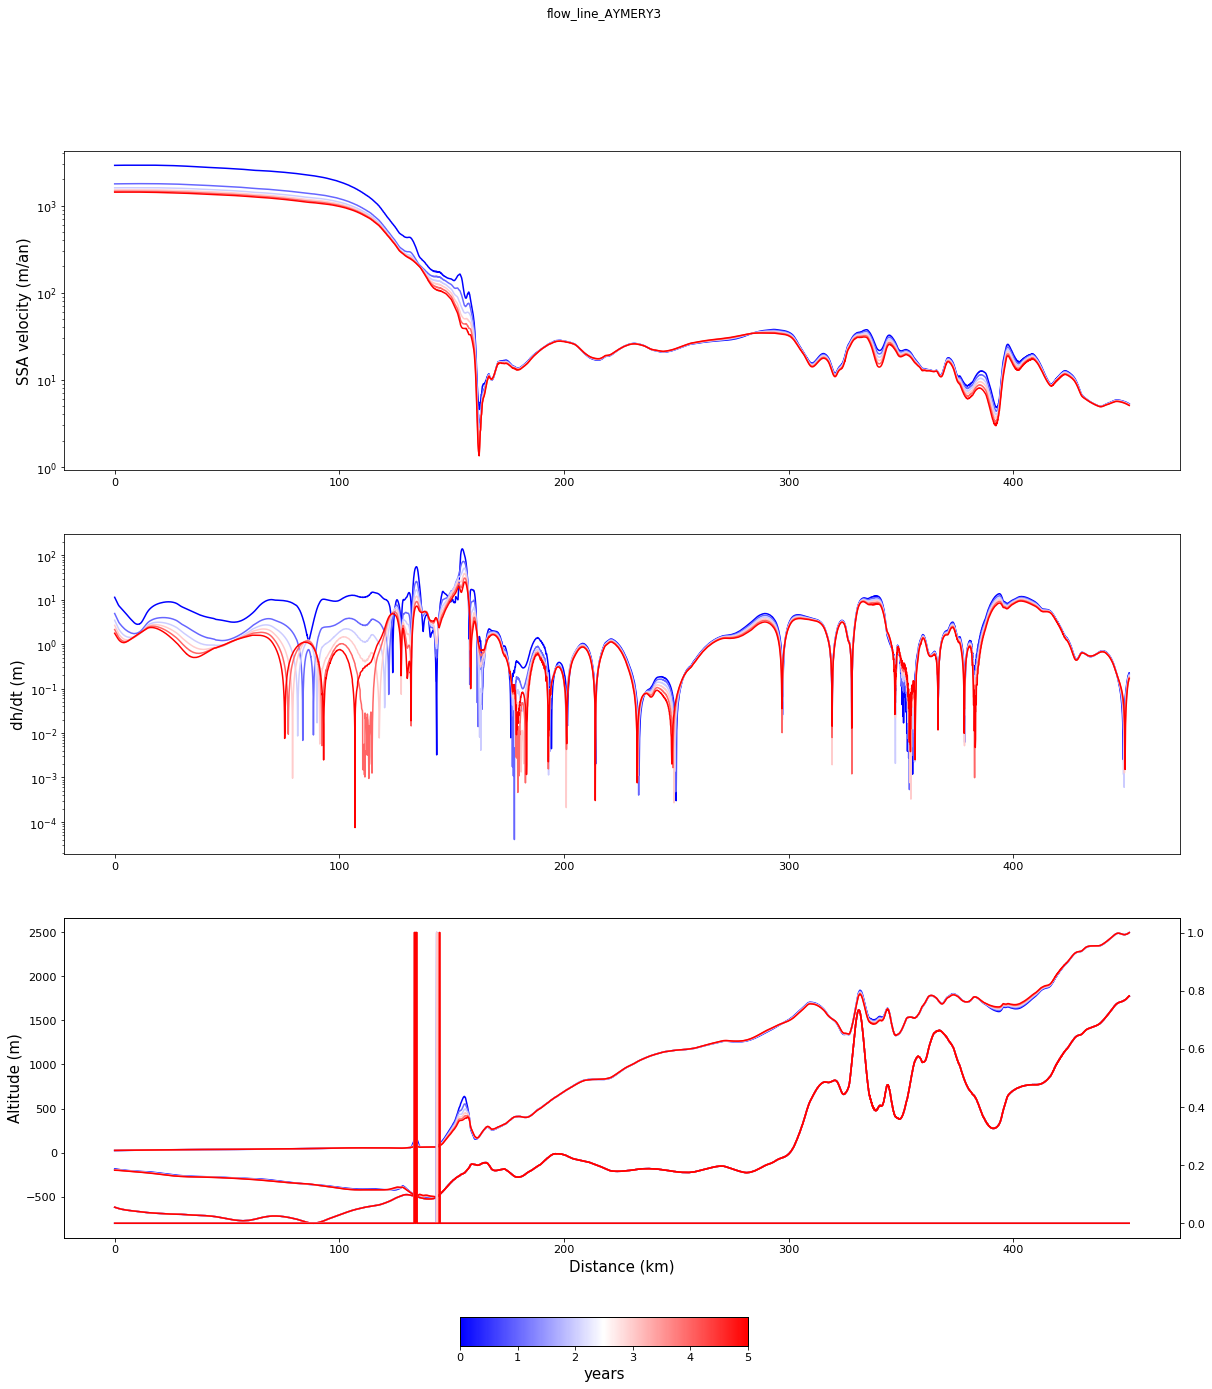

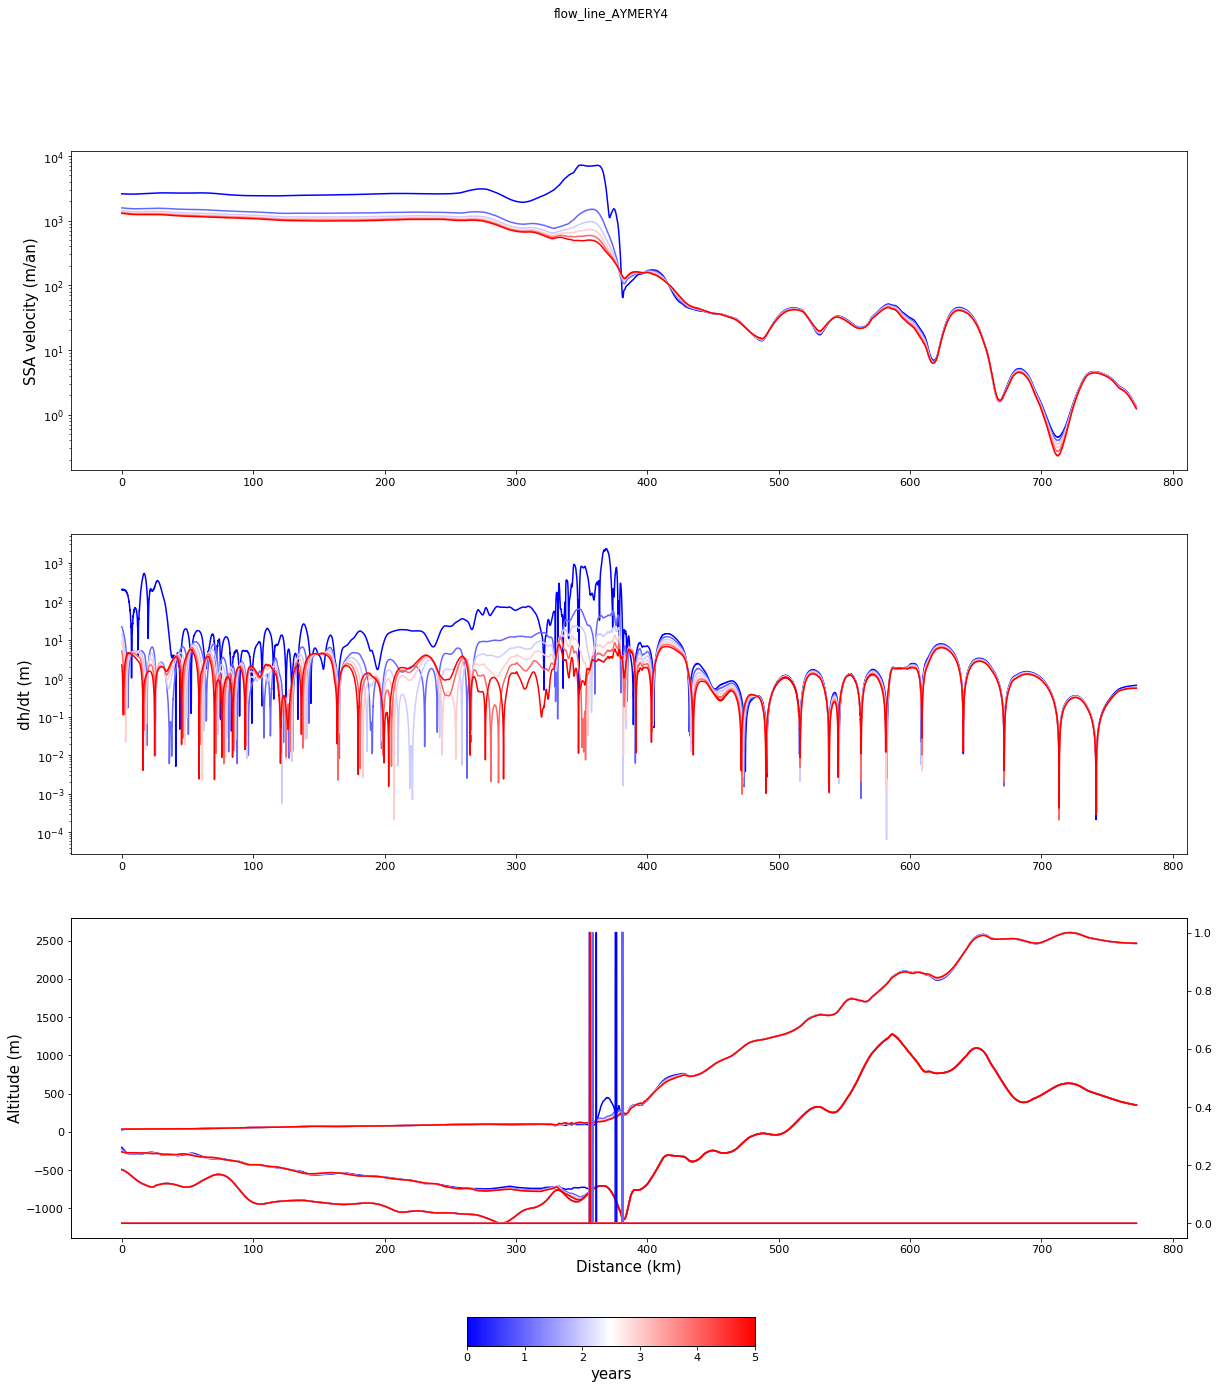

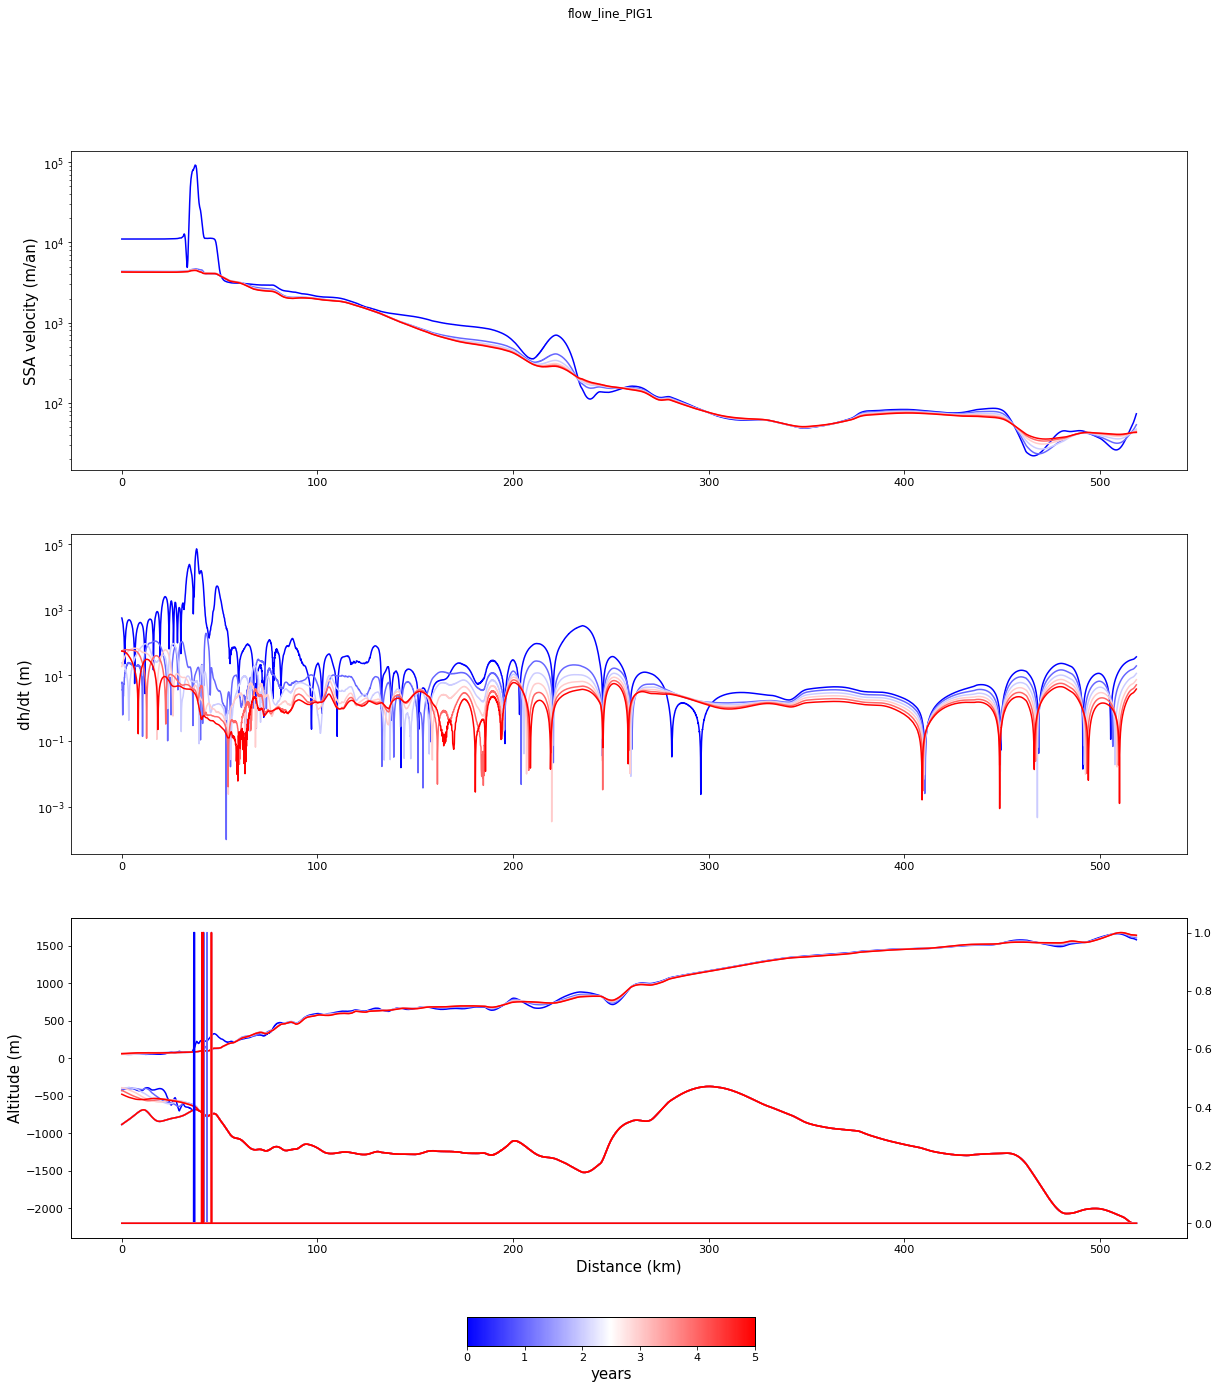

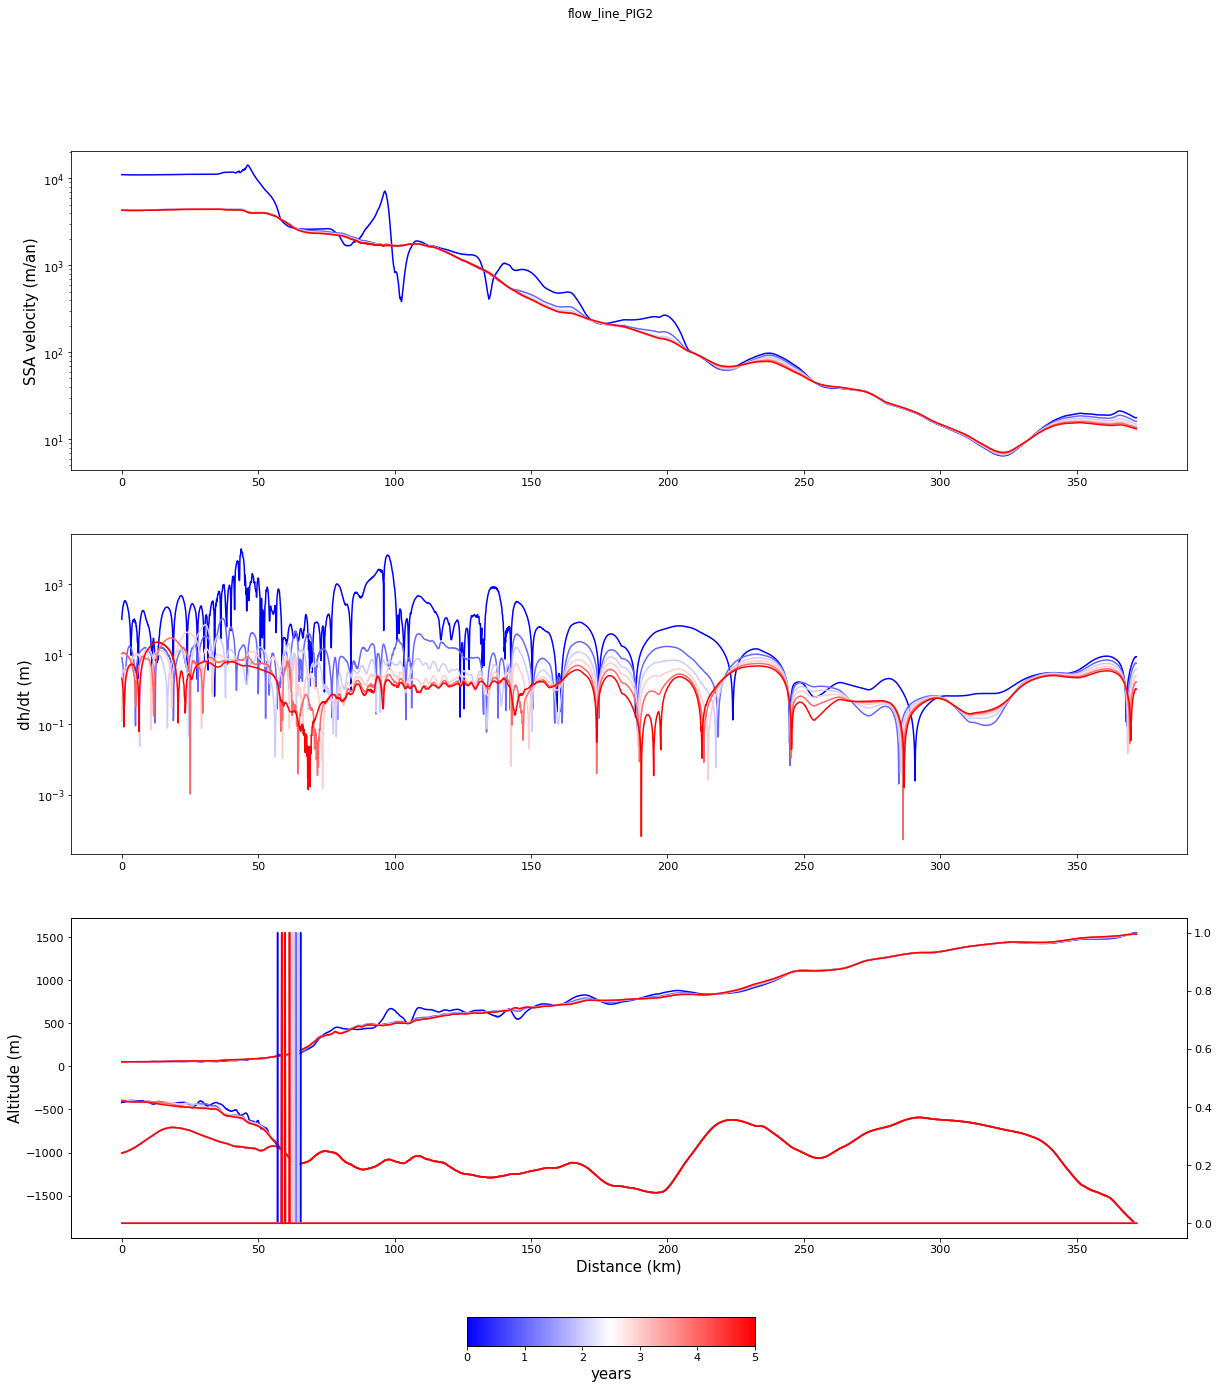

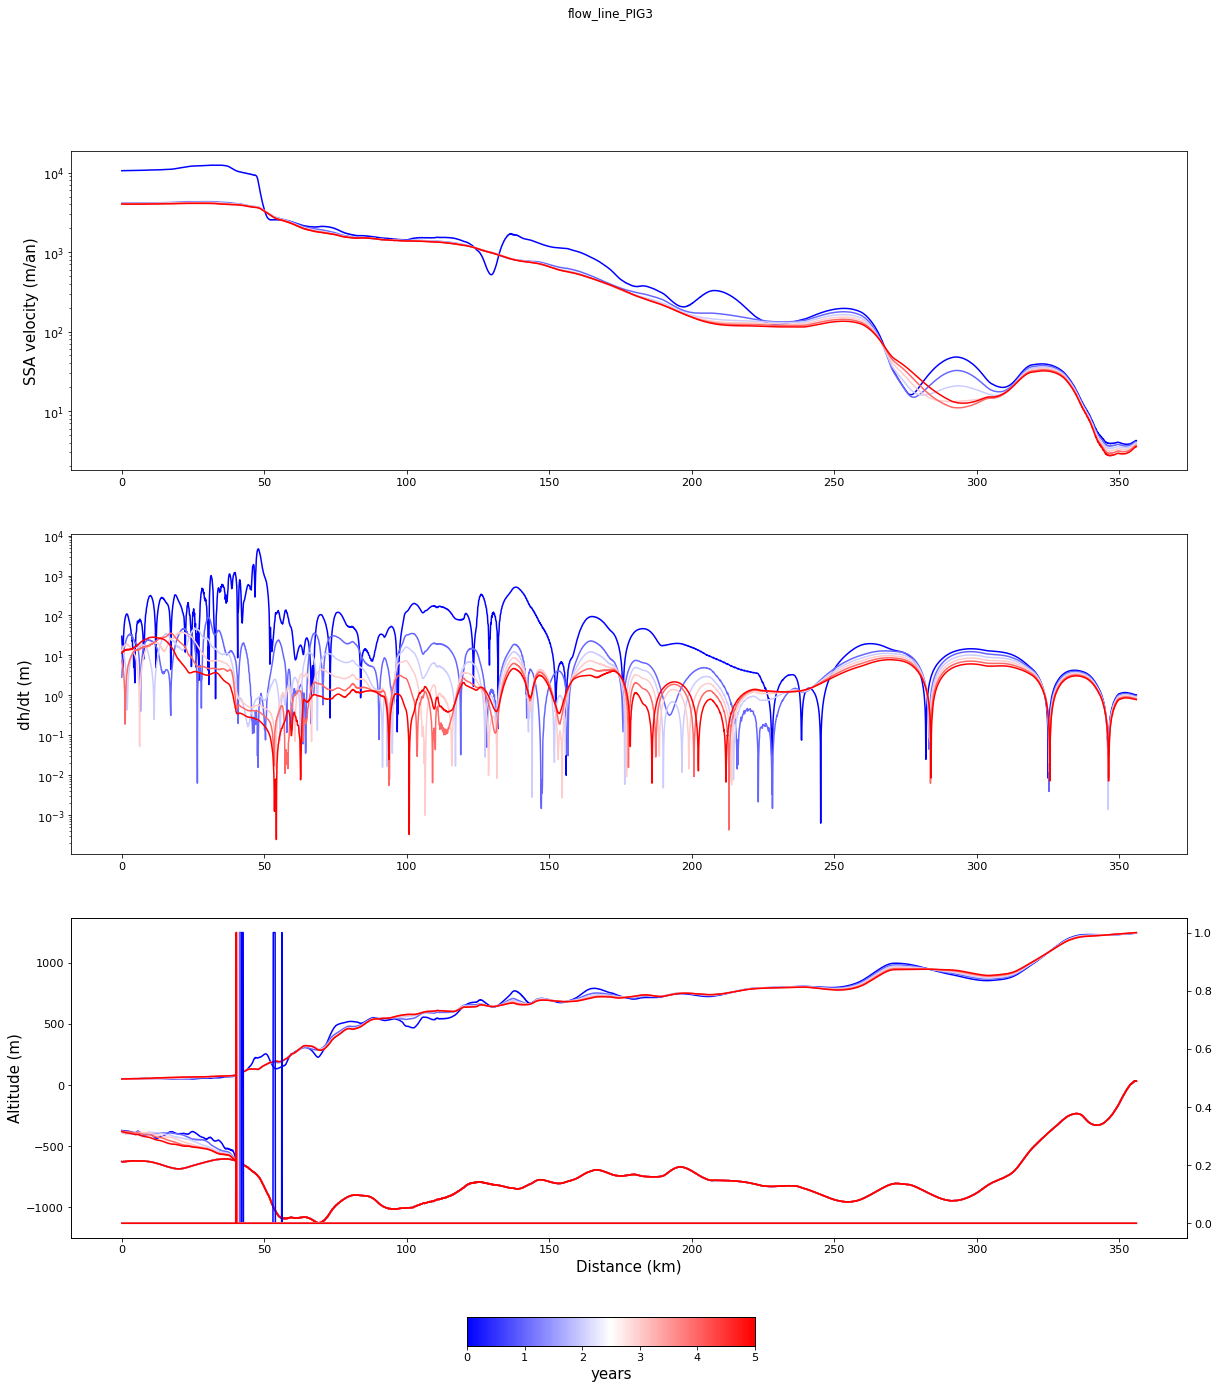

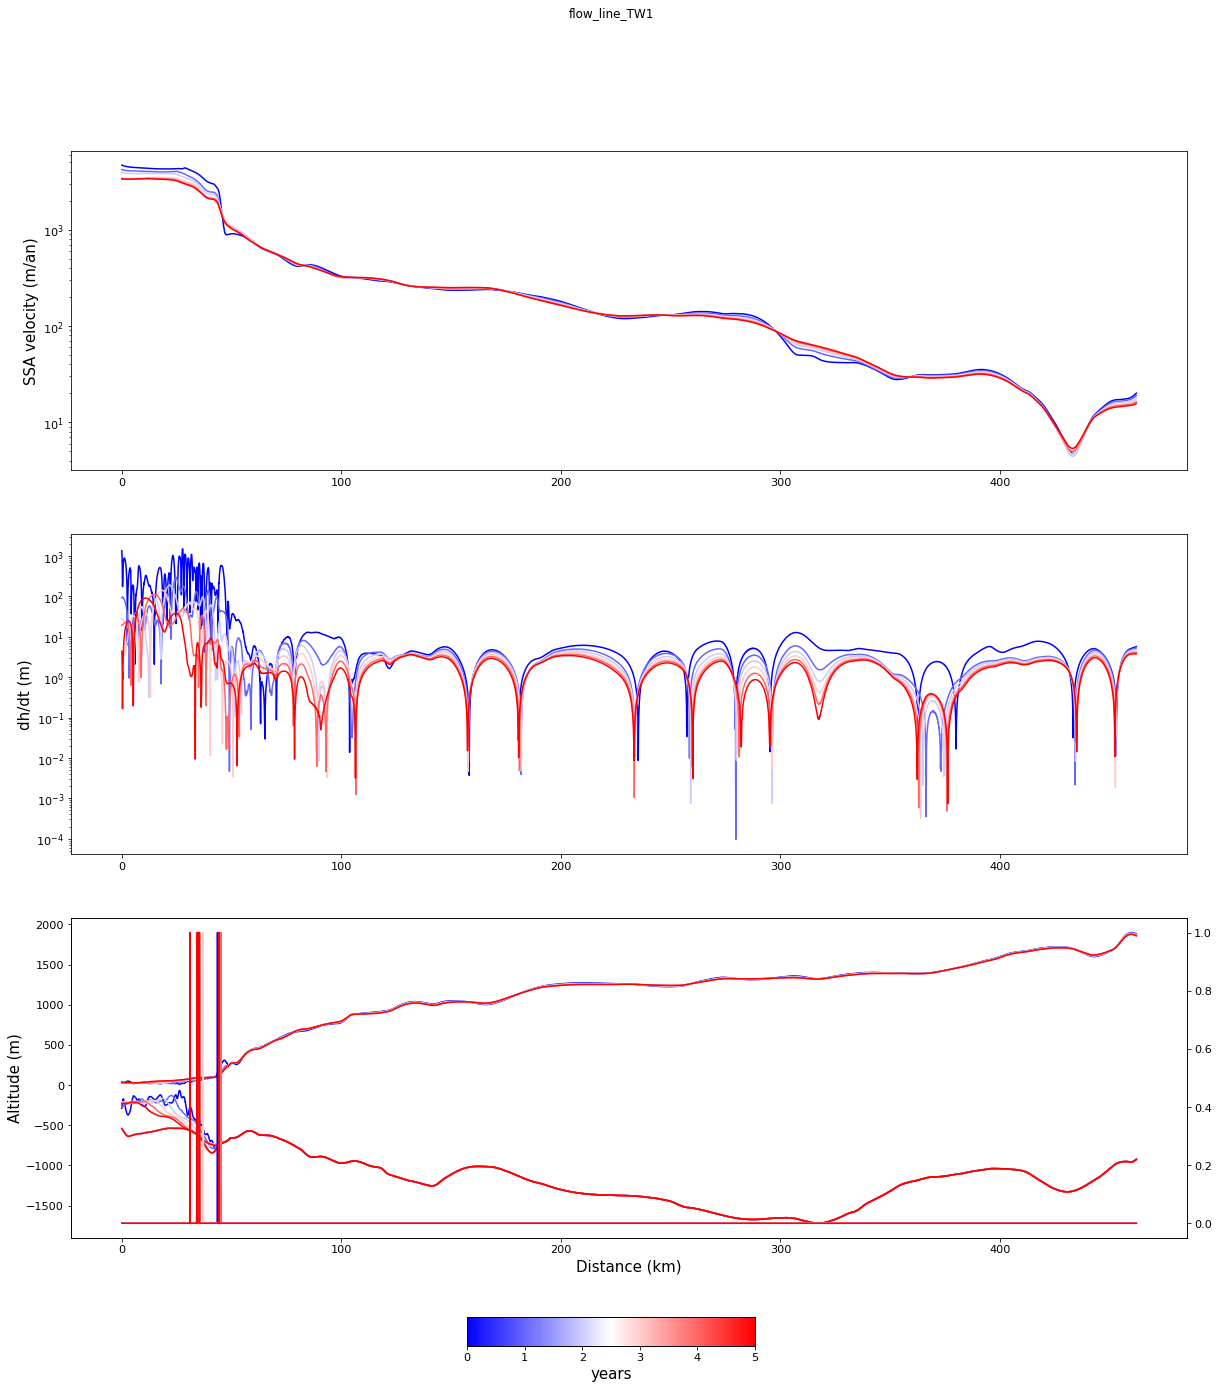

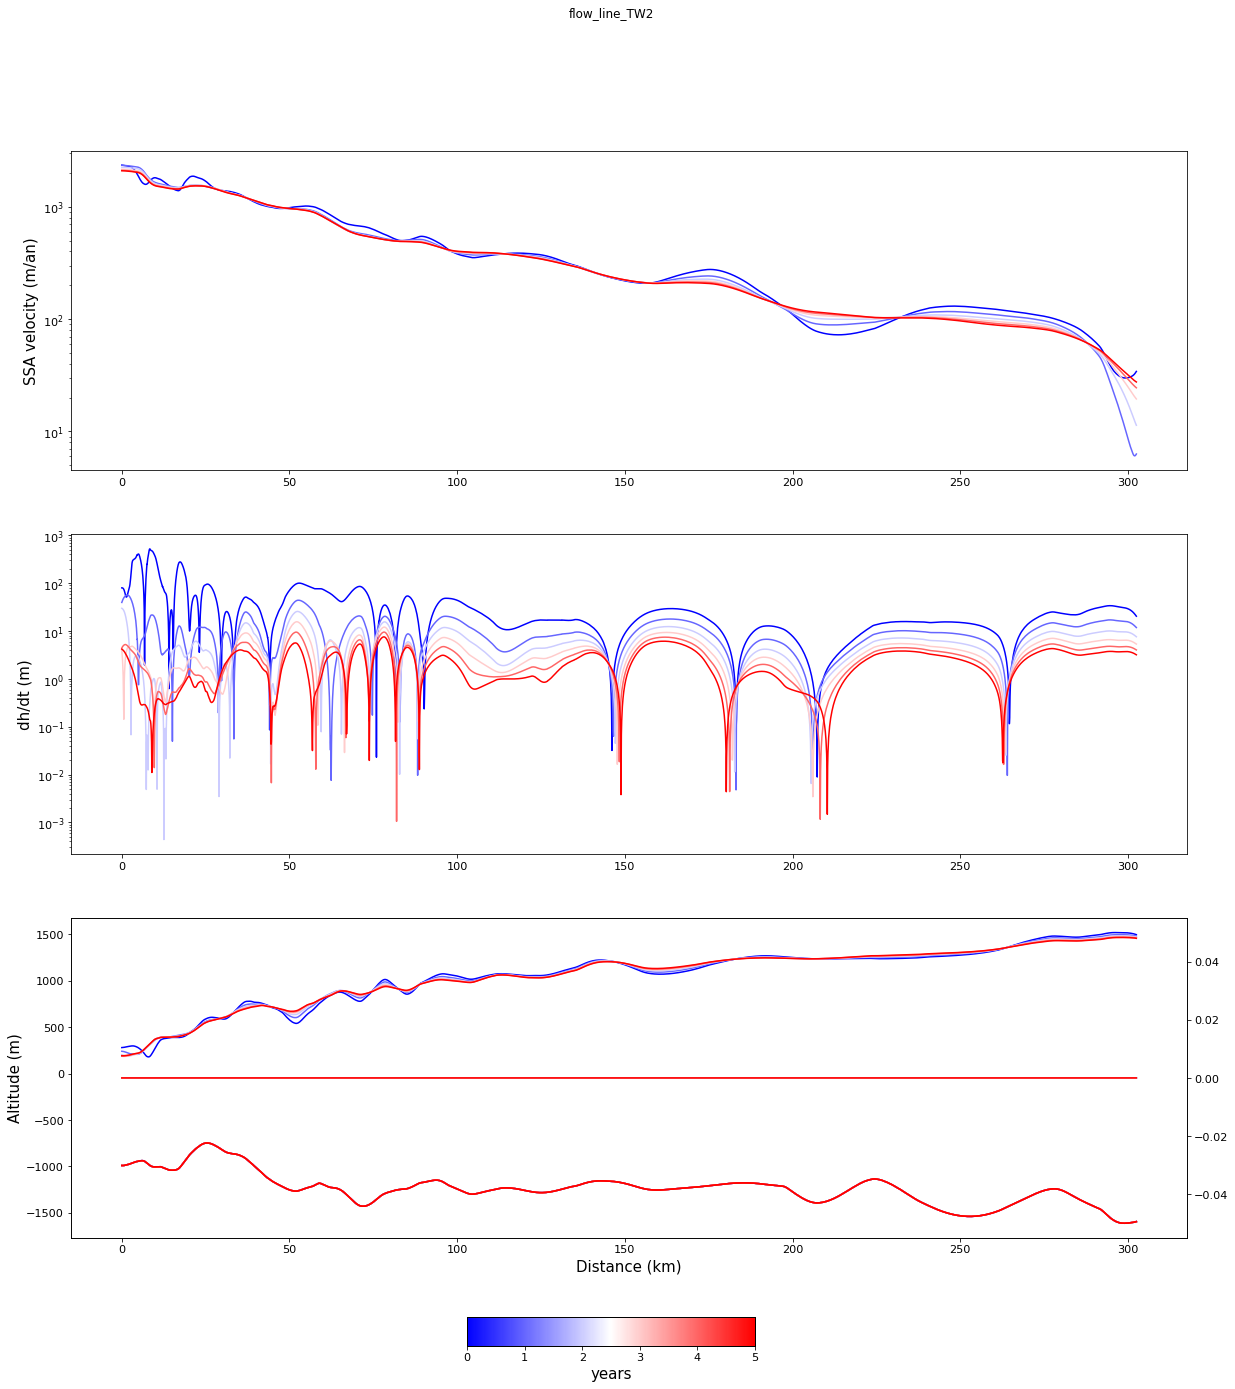

In [13]:
colors = plt.cm.bwr(np.linspace(0,1,len(blocks)))
import matplotlib as mpl

for n in range(0,len(flowlines)):
    xx=flowlines[n][52:-4]
    fig=plt.figure(figsize=[20,20])
   
    ax1=plt.subplot(3,1,1)
    ax2=plt.subplot(3,1,2)
    ax3=plt.subplot(3,1,3)
    ax4 = ax3.twinx()
    for n in range(0,len(blocks)):
        ax1.semilogy(globals()[xx]['dist'],globals()[xx]['ssavelocity_mag'][n,],color=colors[n])
        ax1.set_ylabel('SSA velocity (m/an)')        
        
        ax2.semilogy(globals()[xx]['dist'],abs(globals()[xx]['dhdt'][n,]),color=colors[n])
        ax2.set_ylabel('dh/dt (m)')        

        ax4.plot(globals()[xx]['dist'],abs(globals()[xx]['groundedmask'][n,])<0.1,color=colors[n])
        im=ax3.plot(globals()[xx]['dist'],globals()[xx]['zs'][n,],color=colors[n])
        ax3.plot(globals()[xx]['dist'],globals()[xx]['bedrock'][n,],color=colors[n])
        ax3.plot(globals()[xx]['dist'],globals()[xx]['zb'][n,],color=colors[n],label=str(n))
        ax3.set_xlabel('Distance (km)')
        ax3.set_ylabel('Altitude (m)')
#         ax3.legend()

        ax5=fig.add_subplot(position=[0.4, 0.05, 0.2, 0.02])

        cmap = mpl.cm.bwr
        norm = mpl.colors.Normalize(vmin=0, vmax=len(blocks)-1)

        cb1 = mpl.colorbar.ColorbarBase(ax5, cmap=cmap,
                                        norm=norm,
                                        orientation='horizontal')
        cb1.set_label('years')
        
    fig.suptitle(str(xx))
    

